Loading Data into a dataframe

In [ ]:
import pandas as pd 

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv("processed.cleveland.data", header = None, names = columns )



df = df[~df.isin(['?']).any(axis=1)].reset_index(drop=True)

target = df['target']

df = df.drop('target',axis = 1)

df.describe()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [2]:
df.duplicated().sum()

np.int64(0)

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [4]:
#one-hot encoding
one_hot_encoded_cols = ['ca','restecg','cp', 'slope','thal']

df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_encoded_cols, drop_first=True)

df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca_1.0,ca_2.0,ca_3.0,restecg_1.0,restecg_2.0,cp_2.0,cp_3.0,cp_4.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,False,False,False,False,True,False,False,False,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,False,False,True,False,True,False,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,False,True,False,False,True,False,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,False,False,False,False,False,False,True,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,False,False,False,False,True,True,False,False,False,False,False,False


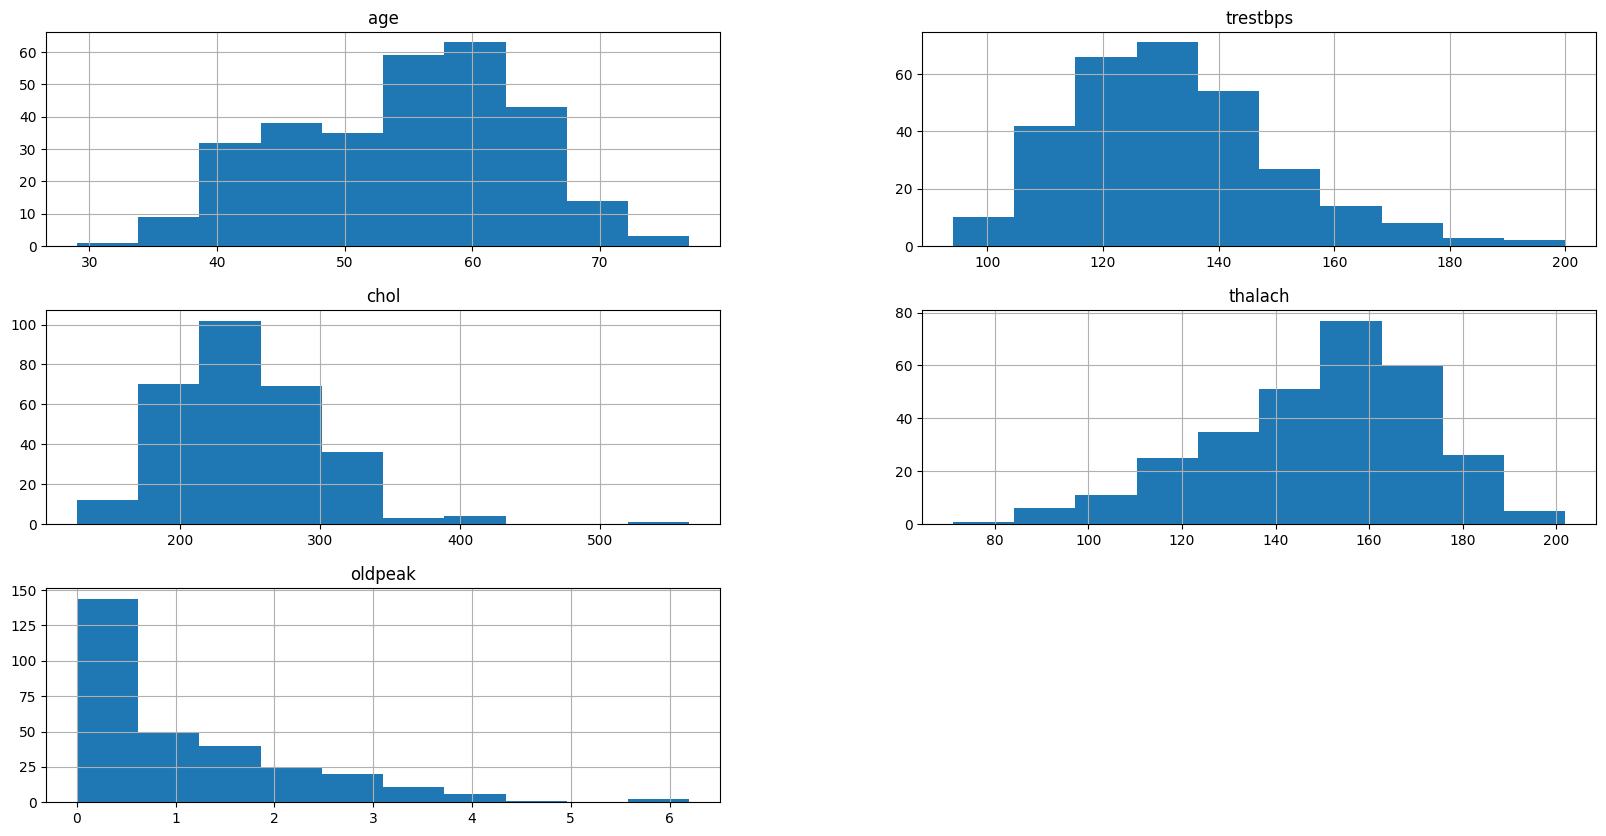

In [5]:
from matplotlib import pyplot as plt
numeric_cols =  ['age','trestbps','chol','thalach','oldpeak']

df[numeric_cols].hist(figsize=(20,10), bins = 10)
plt.show()

since data is not normally distributed (as seen in the plots, it's either left or right skewed). so it's best to use RobustScaler.

In [6]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.538462,1.0,1.0,0.75,-0.153846,1.0,2.0,-0.090909,0.0,0.9375,3.0,0.0,6.0
1,0.846154,1.0,4.0,1.50,0.661538,0.0,2.0,-1.363636,1.0,0.4375,2.0,3.0,3.0
2,0.846154,1.0,4.0,-0.50,-0.215385,0.0,2.0,-0.727273,1.0,1.1250,2.0,2.0,7.0
3,-1.461538,1.0,3.0,0.00,0.107692,0.0,0.0,1.030303,0.0,1.6875,3.0,0.0,3.0
4,-1.153846,0.0,2.0,0.00,-0.600000,0.0,2.0,0.575758,0.0,0.3750,1.0,0.0,3.0
5,0.000000,1.0,2.0,-0.50,-0.107692,0.0,0.0,0.757576,0.0,0.0000,1.0,0.0,3.0
6,0.461538,0.0,4.0,0.50,0.384615,0.0,2.0,0.212121,0.0,1.7500,3.0,2.0,3.0
7,0.076923,0.0,4.0,-0.50,1.707692,0.0,0.0,0.303030,1.0,-0.1250,1.0,0.0,3.0
8,0.538462,1.0,4.0,0.00,0.169231,0.0,2.0,-0.181818,0.0,0.3750,2.0,1.0,7.0
9,-0.230769,1.0,4.0,0.50,-0.615385,1.0,2.0,0.060606,1.0,1.4375,3.0,0.0,7.0


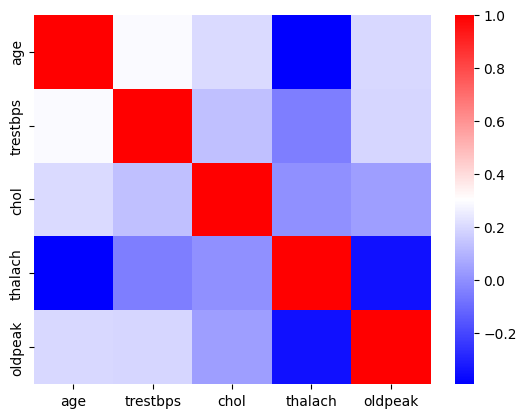

<Figure size 640x480 with 0 Axes>

In [7]:
import seaborn as sns

plt.clf()
sns.heatmap(df[numeric_cols].corr(), cmap = 'bwr')
plt.show()
plt.clf()


the heatmap shows strong negative linear correlations between:
*thalach and age
*thalach and olpeak